Note: if you want to see a way to surf pages, take a look at PrairieLearn

Leaving the question and the code below:


Google's dominance as a search engine came from their PageRank algorithm, named after co-founder Larry Page. By assigning each page a relative rank, web searches can give more relevant results.

You are given an adjacency matrix A with the website connectivity data (the image above illustrates the idea of webpage linkage, not A). Your first task is to convert the matrix A into a Markov matrix M. Recall that the columns of a Markov matrix must add up to
, and that if a website does not have any outgoing links we can model it as randomly going to any other page with a probability of
(where
is the total number of websites included in A ).

In the original draft paper of the PageRank algorithm, Page and Brin figured that a web surfer may become "bored" of clicking through links and directly go to some random page by typing it into their browser URL bar (and hence a probability of
of going to any other page).

To model this "bored" user behavior, they proposed the following: a random surfer will move from one website to another following the outgoing links with a probability 1/N
, however, this random surfer will go to a random page with probability
. The probability
that the surfer will continue clicking on links is called a damping factor. Studies have tested different damping factors, but it is generally assumed that
will be set around 0.85. This new model is represented by the Google matrix G, given as:
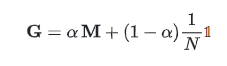
𝟙
where
𝟙
is a matrix with the same shape as M filled with "ones". In your code snippet, define the Google matrix G using the above definition and
.

After you define the matrix G, use the provided function power_iteration to get the steady-state eigenvector x of the Google matrix (you do not need to implement your own power iteration method). This is the same function that you created during the computational lab, and has the following signature:

def power_iteration(M, x0):
M: (N,N) matrix
x0: normalized initial guess
the code computes the steady-state as x
return x
You are given labels which contains a list with the website names. Use this list and the steady-state solution to find the name of the website that has the largest Page ranking. Save this highest ranked website as top. You might find numpy.argmax() helpful.

The setup code gives the following variables:

Name Type Description
power_iteration function Helper function that performs power iteration
A 2d numpy array Adjacency matrix containing which websites are connected to each other
labels list Names of each website such that the
'th label matches the
'th row/column in the adjacency matrix
N integer Number of websites
Your code snippet should define the following variables:

Name Type Description
M 2d numpy array Markov matrix
G 2d numpy array Google matrix
x 1d numpy array Eigenvector of the Google matrix that corresponds to the largest magnitude eigenvalue
top string Top ranked website


### Page Link:

https://us.prairielearn.com/pl/course_instance/159904/instance_question/459927575/


In [ ]:
import numpy as np
import numpy.linalg as la

M = A.copy()


for i in range(len(A)):
    csum = A[:,i].sum()
    
    if csum == 0:
        M[:,i] = np.ones(len(A)) / len(A)
    else:
        M[:,i] = A[:,i] / csum

G = M * 0.85 + (1 - 0.85) * np.ones(A.shape) / len(A)

x = power_iteration(G, np.ones(len(A)) / len(A))
topIndex = np.argmax(x)
top = labels[topIndex]

Basic Markov Chains:


In [ ]:

import numpy as np
import numpy.linalg as la

markov_matrix = np.array([[.8, .1, .05, .1],
                          [.05, .4, .05, .1],
                          [.05, .1, .7, .15],
                          [.1, .4, .2, .65]])
# Av = Iv
# (A-I)v = 0
I4 = np.diag([1, 1, 1, 1])
print(I4)

steady_state = np.array([1, 0, 0, 0])
for i in range(1000):
    steady_state = markov_matrix @ steady_state
# steady_state = la.solve((markov_matrix - I4), np.array([0, 0, 0, 0]))
# print(steady_state)
# print(la.eig(markov_matrix))

prob_list = (markov_matrix @ markov_matrix @ markov_matrix @ np.array([1, 0, 0, 0]))